In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/dsma-crisismmd/")
!pwd

/content/drive/MyDrive/dsma-crisismmd


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image


In [ ]:
!pip install transformers torchvision pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# Load the model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
df = pd.read_csv("cleaned_data.csv", index_col=0)

In [ ]:
df.tail()

,tweet_id,image_id,text_info,image_info,tweet_text,image_path,processed_tweet_text,label,manual_label,is_ambiguous
1584,923761170967797761,923761170967797761_0,informative,informative,GOP targets environmental rules after Californ...,data_image/california_wildfires/27_10_2017/923...,gop targets environmental rules after californ...,Informative,informative,0
1585,923796193670336512,923796193670336512_0,informative,not_informative,Motorcycle crash sparked 350-acre fire in Clev...,data_image/california_wildfires/27_10_2017/923...,motorcycle crash sparked 350-acre fire in clev...,Ambiguous,informative,1
1586,923821955568013313,923821955568013313_0,not_informative,informative,Carlâ€™s Jr. #SantaRosa catches #Fire while ma...,data_image/california_wildfires/27_10_2017/923...,carlâ€™s jr. #santarosa catches #fire while ma...,Ambiguous,informative,1
1587,923844053426348032,923844053426348032_0,informative,not_informative,Inside the List: The Romance Writer Who Almost...,data_image/california_wildfires/27_10_2017/923...,inside the list: the romance writer who almost...,Ambiguous,informative,1
1588,923879231175630848,923879231175630848_0,not_informative,not_informative,"How long will heat, wildfire threat persist in...",data_image/california_wildfires/27_10_2017/923...,"how long will heat, wildfire threat persist in...",Uninformative,not_informative,0


In [ ]:
def extract_clip_embeddings(df):
    text_embeds = []
    image_embeds = []
    valid_indices = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):
        try:
            text = row['processed_tweet_text']
            img_path = row['image_path']

            image = Image.open(img_path).convert("RGB")
            inputs = processor(text=[text], images=image, return_tensors="pt", padding=True).to(device)

            with torch.no_grad():
                outputs = model(**inputs)
                img_feat = outputs.image_embeds.squeeze().cpu().numpy()
                txt_feat = outputs.text_embeds.squeeze().cpu().numpy()

            text_embeds.append(txt_feat)
            image_embeds.append(img_feat)
            valid_indices.append(idx)

        except Exception as e:
            print(f"Error on row {idx}: {e}")
            continue

    return np.array(text_embeds), np.array(image_embeds), valid_indices


In [ ]:
import numpy as np

In [ ]:
from tqdm import tqdm

# Convert labels to binary
df['label_binary'] = df['manual_label'].str.lower().str.strip().map({
    "informative": 1,
    "not_informative": 0
})

# Get only valid rows (without errors during embedding)
text_embeds, image_embeds, valid_indices = extract_clip_embeddings(df)
df_valid = df.iloc[valid_indices].reset_index(drop=True)
labels = df_valid['label_binary'].values

100%|██████████| 1589/1589 [24:53<00:00,  1.06it/s]


In [ ]:
print(df_valid.shape, df.shape)

(1589, 11) (1589, 11)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


is_ambiguous_flags = df_valid['is_ambiguous'].values  # 0 or 1

# Early fusion of text and image embeddings
X = np.hstack([text_embeds, image_embeds])
y = labels

In [ ]:
# Train-test split stratified by ambiguity and label

stratify_labels = [f"{label}_{amb}" for label, amb in zip(y, is_ambiguous_flags)]

# Perform the split
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
    X,
    y,
    range(len(y)),
    stratify=is_ambiguous_flags,
    test_size=0.2,
    random_state=42
)

In [ ]:
train_data = df_valid.iloc[train_idx].reset_index(drop=True)
test_data = df_valid.iloc[test_idx].reset_index(drop=True)

In [ ]:
# Print stats
print("Proportion of Ambiguous Data in Training Set:", train_data['is_ambiguous'].mean())
print("Proportion of Ambiguous Data in Testing Set:", test_data['is_ambiguous'].mean())
print("Train:", train_data.shape)
print("Test:", test_data.shape)

Proportion of Ambiguous Data in Training Set: 0.24154209284028325
Proportion of Ambiguous Data in Testing Set: 0.24213836477987422
Train: (1271, 11)
Test: (318, 11)


In [ ]:
test_data[test_data['is_ambiguous'] == True]['manual_label'].value_counts()

,count
manual_label,
informative,76
not_informative,1


In [ ]:
# Print stats
print("Proportion of Ambiguous Data in Training Set:", train_data['is_ambiguous'].mean())
print("Proportion of Ambiguous Data in Testing Set:", test_data['is_ambiguous'].mean())
print("Train:", train_data.shape)
print("Test:", test_data.shape)

Proportion of Ambiguous Data in Training Set: 0.24154209284028325
Proportion of Ambiguous Data in Testing Set: 0.24213836477987422
Train: (1271, 11)
Test: (318, 11)


# Logistic Classifier without class weights

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["not informative", "informative"]))


                 precision    recall  f1-score   support

not informative       0.75      0.42      0.54        57
    informative       0.88      0.97      0.93       261

       accuracy                           0.87       318
      macro avg       0.82      0.70      0.73       318
   weighted avg       0.86      0.87      0.86       318



In [ ]:
results_df = pd.DataFrame({
    'true_label': y_test,
    'pred_label': y_pred,
}, index=test_data.index)

# Join with `test_data` to get 'is_ambiguous' flag
results_df = results_df.join(test_data[['is_ambiguous']])

# Filter only ambiguous data
ambiguous_results = results_df[results_df['is_ambiguous'] == True]

# Classification report for ambiguous data
print("📊 Classification Report for Ambiguous Tweets:")
print(classification_report(
    ambiguous_results['true_label'],
    ambiguous_results['pred_label'],
    target_names=["not informative", "informative"]
))

📊 Classification Report for Ambiguous Tweets:
                 precision    recall  f1-score   support

not informative       0.00      0.00      0.00         1
    informative       0.99      0.89      0.94        76

       accuracy                           0.88        77
      macro avg       0.49      0.45      0.47        77
   weighted avg       0.97      0.88      0.93        77



# Logistic classifier with class weights

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["not informative", "informative"]))


                 precision    recall  f1-score   support

not informative       0.42      0.75      0.54        57
    informative       0.93      0.77      0.84       261

       accuracy                           0.77       318
      macro avg       0.68      0.76      0.69       318
   weighted avg       0.84      0.77      0.79       318



In [ ]:
results_df = pd.DataFrame({
    'true_label': y_test,
    'pred_label': y_pred,
}, index=test_data.index)

# Join with `test_data` to get 'is_ambiguous' flag
results_df = results_df.join(test_data[['is_ambiguous']])

# Filter only ambiguous data
ambiguous_results = results_df[results_df['is_ambiguous'] == True]

# Classification report for ambiguous data
print("📊 Classification Report for Ambiguous Tweets:")
print(classification_report(
    ambiguous_results['true_label'],
    ambiguous_results['pred_label'],
    target_names=["not informative", "informative"]
))

📊 Classification Report for Ambiguous Tweets:
                 precision    recall  f1-score   support

not informative       0.02      1.00      0.04         1
    informative       1.00      0.36      0.52        76

       accuracy                           0.36        77
      macro avg       0.51      0.68      0.28        77
   weighted avg       0.99      0.36      0.52        77



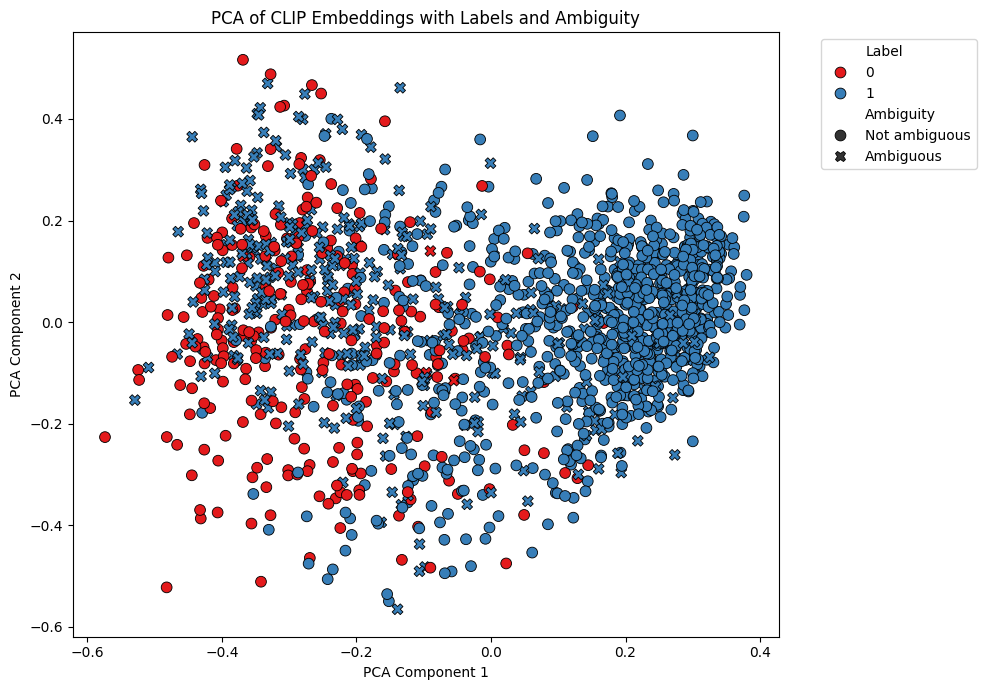

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

is_ambiguous_flags = df_valid['is_ambiguous'].values
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for easier plotting
df_vis = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Label': label_encoder.inverse_transform(y_encoded),
    'Ambiguity': ['Ambiguous' if flag else 'Not ambiguous' for flag in is_ambiguous_flags]
})

# Plot with hue for label and style for ambiguity
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_vis,
    x='PCA1',
    y='PCA2',
    hue='Label',
    style='Ambiguous',
    palette='Set1',
    s=60,
    edgecolor='k'
)
plt.title("PCA of CLIP Embeddings with Labels and Ambiguity")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
np.savez("dsma_clip_features.npz",
         text_embeds=text_embeds,
         image_embeds=image_embeds,
         labels=labels,
         is_ambiguous=is_ambiguous_flags)


In [ ]:
data = np.load("dsma_clip_features.npz")
text_embeds = data["text_embeds"]
image_embeds = data["image_embeds"]
labels = data["labels"]
is_ambiguous_flags = data["is_ambiguous"]

In [ ]:
print(sns.color_palette("s").as_hex())
